Name: Josemaria Macedo Carrillo\
Ttile: UN Data Analysis\
Created: 06/15/23\
Last modified: 07/26/23\
DSI

The purpose of this notebook is to replicate some of the data visualizations from the
Black Sea Grain Initiative (BSGI) UN report to get familiarized with the BSGI data.

In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils.plot import cargo_grouping, plot_pie, plot_horizontal

Load data from Black Sea Grain Initiative.

In [2]:
destinations = pd.read_csv("../data/bsgi/bsgi_destinations.csv", thousands=",")
outbound = pd.read_csv("../data/bsgi/bsgi_outbound.csv", thousands=",", parse_dates=["Departure date"])

Cargo exported by country chart (page 1). Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html.

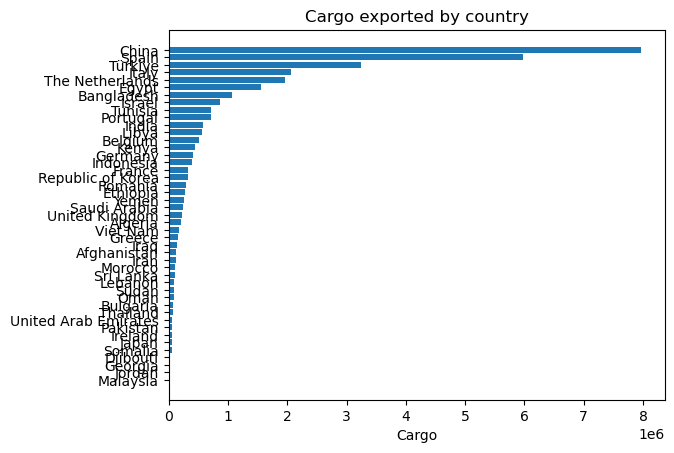

In [3]:
graph_1 = cargo_grouping(destinations, ["Country"], ["total metric tons"], ["cargo"], False, ["cargo"])
plot_horizontal(graph_1, "cargo", "Country", "Cargo", "Cargo exported by country")

Cargo exported by economic development (page 1).

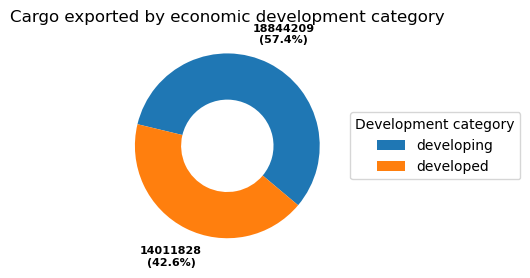

In [4]:
graph_2 = cargo_grouping(destinations, ["Development category"], ["total metric tons"], ["cargo"], False, ["cargo"])

cargo = graph_2.loc[:, "cargo"]
categories = graph_2.loc[:, "Development category"]
plot_pie(categories, cargo, "Development category", "Cargo exported by economic development category")

Cargo by World Food Programme recipient country (page 2).

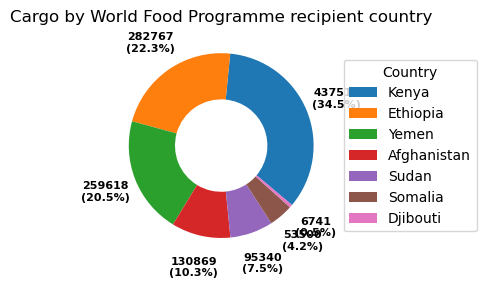

In [5]:

wfp = outbound.loc[(outbound.loc[:, "Country"] == "Afghanistan") | (outbound.loc[:, "Country"] == "Djibouti") | (outbound.loc[:, "Country"] == "Ethiopia")| (outbound.loc[:, "Country"] == "Kenya") | (outbound.loc[:, "Country"] == "Somalia") | (outbound.loc[:, "Country"] == "Sudan") | (outbound.loc[:, "Country"] == "Yemen")]

# The numbers for some countries (Kenya, Yemen, Sudan, Somalia) look very off. Check if there's a problem with how we're grouping the data
graph_4 = cargo_grouping(wfp, ["Country"], ["Metric tons"], ["cargo"], False, ["cargo"])

values = graph_4.loc[:, "cargo"]
categories = graph_4.loc[:, "Country"]
plot_pie(categories, values, "Country", "Cargo by World Food Programme recipient country")
